# IMPORT & SETUP

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [13]:
file_path = 'dataset/train.csv'
data = pd.read_csv(file_path)

features_used = ['Inherited from father', 'Maternal gene', 'Paternal gene', 'Genes in mother\'s side', 'Symptom 1',
                 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']
targets = ['Genetic Disorder', 'Disorder Subclass']

dataset = data.loc[:, features_used + targets].dropna(subset=['Genetic Disorder', 'Disorder Subclass'], how='all')
# Fill missing values in 'Genetic Disorder' based on 'Disorder Subclass'
subclass_to_disorder = {
    'Leber\'s hereditary optic neuropathy': 'Mitochondrial genetic inheritance disorders',
    'Leigh syndrome': 'Mitochondrial genetic inheritance disorders',
    'Mitochondrial myopathy': 'Mitochondrial genetic inheritance disorders',
    'Alzheimer\'s': 'Multifactorial genetic inheritance disorders',
    'Cancer': 'Multifactorial genetic inheritance disorders',
    'Diabetes': 'Multifactorial genetic inheritance disorders',
    'Cystic fibrosis': 'Single-gene inheritance diseases',
    'Hemochromatosis': 'Single-gene inheritance diseases',
    'Tay-Sachs': 'Single-gene inheritance diseases',
}

dataset['Genetic Disorder'] = dataset.apply(
    lambda row: subclass_to_disorder[row['Disorder Subclass']]
    if pd.isna(row['Genetic Disorder']) else row['Genetic Disorder'],
    axis=1
)
dataset = dataset.drop(['Disorder Subclass'], axis=1)
# dataset = dataset.dropna(subset=['Disorder Subclass'], how='all')

# CATEGORIAL BINARY
dataset["Genes in mother's side"] = dataset["Genes in mother's side"].replace({'Yes': 1.0, 'No': 0.0})
dataset['Inherited from father'] = dataset['Inherited from father'].replace({'No': 0.0, 'Yes': 1.0})
dataset['Maternal gene'] = dataset['Maternal gene'].replace({'No': 0.0, 'Yes': 1.0})
dataset["Paternal gene"] = dataset["Paternal gene"].replace({'Yes': 1.0, 'No': 0.0})

# dataset = dataset.dropna(subset=['Symptom 4', 'Symptom 5'])
#-------------------------------------------------------%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--------------------------------#
genetic_disorder_mapping = {
    'Mitochondrial genetic inheritance disorders': 1,
    'Multifactorial genetic inheritance disorders': 0,
    'Single-gene inheritance diseases': 2,
}
dataset['Genetic Disorder'] = dataset['Genetic Disorder'].map(genetic_disorder_mapping)

# disorder_subclass_mapping = {
#     "Leber's hereditary optic neuropathy": 0,
#     'Cystic fibrosis': 1,
#     'Diabetes': 2,
#     'Leigh syndrome': 3,
#     'Tay-Sachs': 4,
#     'Mitochondrial myopathy': 5,
#     'Hemochromatosis': 6,
#     "Alzheimer's": 7,
#     'Cancer': 8,
# }
# 
# dataset['Disorder Subclass'] = dataset['Disorder Subclass'].map(disorder_subclass_mapping)
heat_data = dataset.copy().dropna()

<AxesSubplot: >

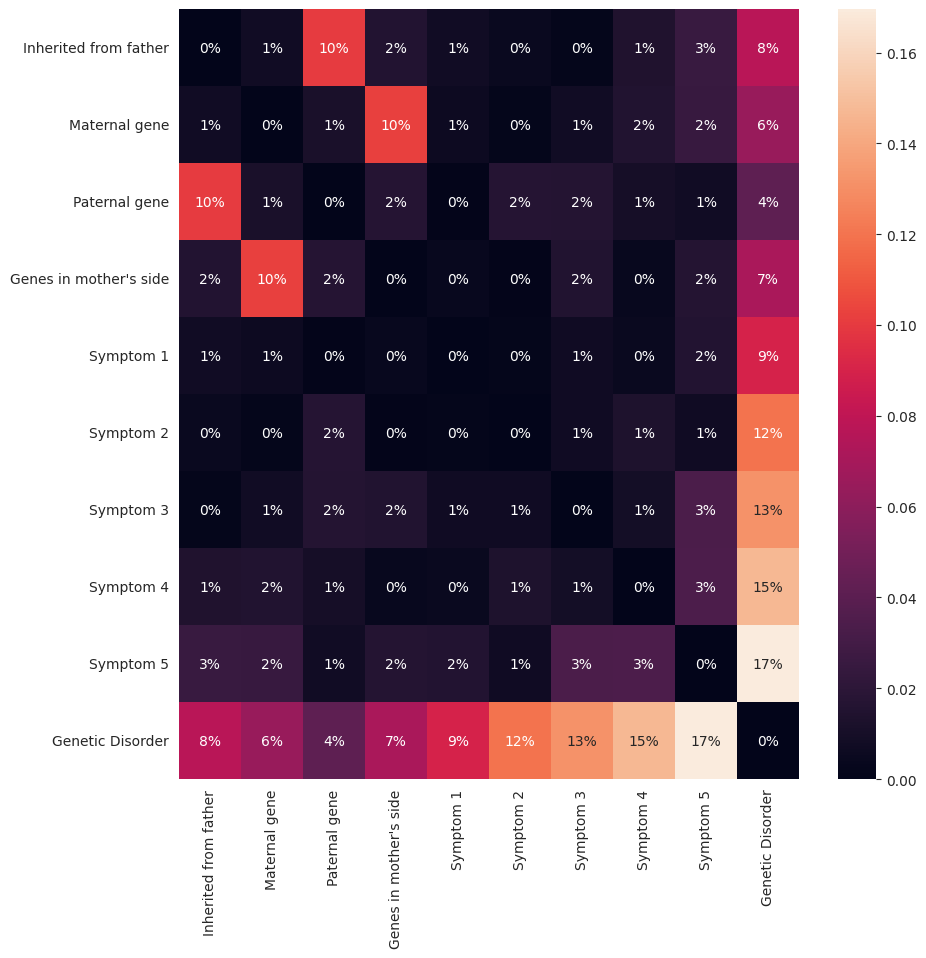

In [14]:
corr = heat_data.corr().applymap(lambda x: 0 if x > 0.99 else abs(x))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".0%")

In [15]:
robust_scaler = RobustScaler()

X_train, X_test, Y_train, Y_test = train_test_split(robust_scaler.fit_transform(heat_data.loc[:, features_used]),
                                                    heat_data.loc[:, 'Genetic Disorder'],
                                                    test_size=0.2, random_state=43)

In [16]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
lp_models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
lp_models

100%|██████████| 29/29 [00:10<00:00,  2.72it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 9890, number of used features: 9
[LightGBM] [Info] Start training from score -2.249423
[LightGBM] [Info] Start training from score -0.668578
[LightGBM] [Info] Start training from score -0.962065


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.47,0.59,None,0.48,0.08
BaggingClassifier,0.65,0.59,None,0.65,0.05
LGBMClassifier,0.65,0.59,None,0.64,0.12
ExtraTreeClassifier,0.64,0.58,None,0.64,0.01
ExtraTreesClassifier,0.64,0.58,None,0.64,0.34
LabelPropagation,0.64,0.58,None,0.64,2.22
DecisionTreeClassifier,0.64,0.58,None,0.64,0.01
RandomForestClassifier,0.65,0.57,None,0.64,0.32
XGBClassifier,0.65,0.57,None,0.65,0.15
